In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
#Read File
df = pd.read_csv('/content/sample_data/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

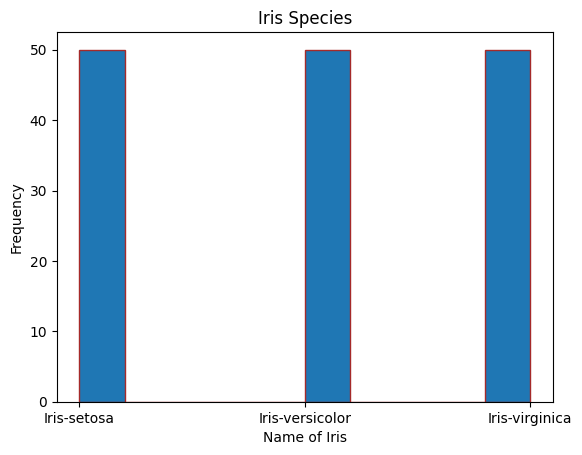

In [9]:
# Histogram of 'Species' column
plt.hist(df['Species'], bins=10, edgecolor='brown')
plt.title('Iris Species')
plt.xlabel('Name of Iris')
plt.ylabel('Frequency')
plt.show()

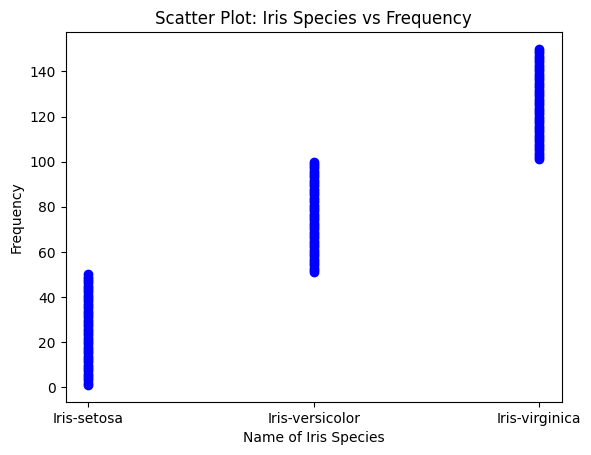

In [18]:
# Scatter plot between 'Iris Species' and 'Id'
plt.scatter(df['Species'], df['Id'], c='blue')
plt.title('Scatter Plot: Iris Species vs Frequency')
plt.xlabel('Name of Iris Species')
plt.ylabel('Frequency')
plt.show()

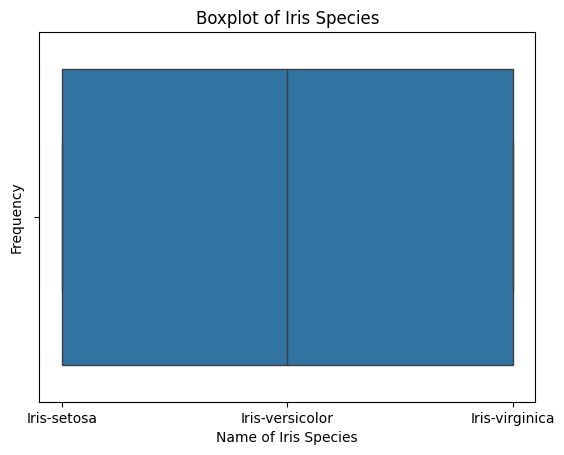

In [19]:
# Boxplot for 'Iris Species'
sns.boxplot(x=df['Species'])
plt.title('Boxplot of Iris Species')
plt.xlabel('Name of Iris Species')
plt.ylabel('Frequency')
plt.show()

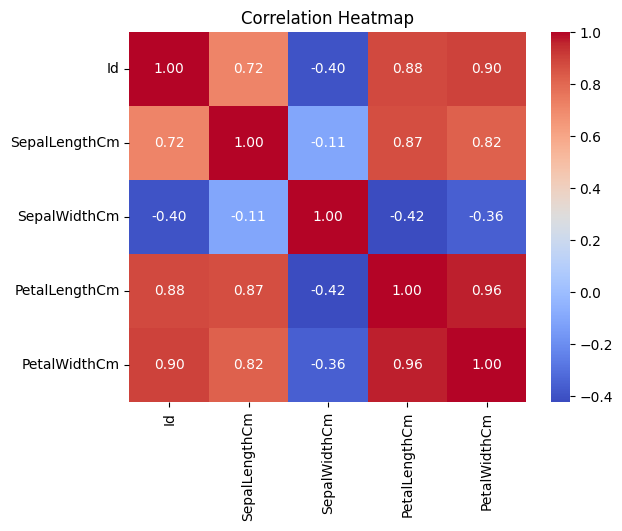

In [13]:
# Correlation heatmap
numerical_values = df.select_dtypes(include=['number'])
correlation_matrix = numerical_values.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

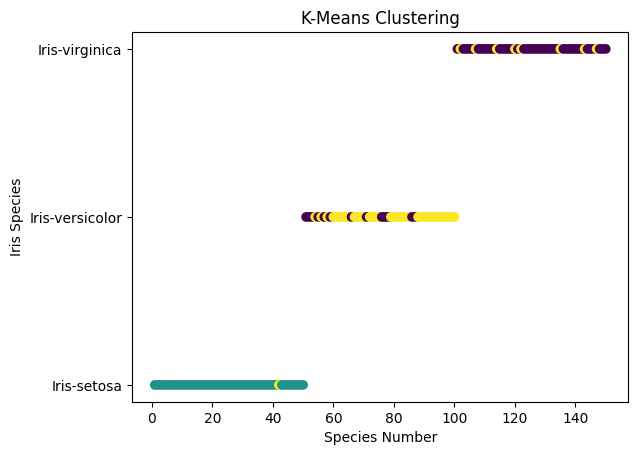

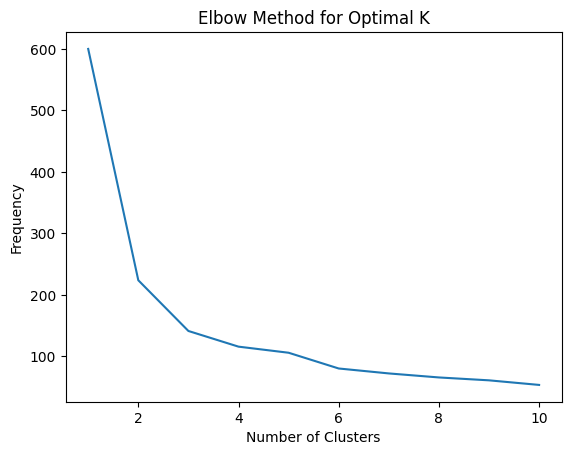

Silhouette Score: 0.34233194789842203


In [21]:
# K-Means Clustering
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot K-Means Clusters
plt.scatter(df['Id'], df['Species'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Species Number')
plt.ylabel('Iris Species')
plt.show()

# Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Frequency')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")